In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pygam import GAM, s, f, LinearGAM
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2

### Import Data

In [5]:
data_path = '../../../Data/KORA_S3_S4/KORA_Noise_CleanData.csv'
# data_path = '../../KORA_Noise_CleanData.csv'
data = pd.read_csv(data_path)
print(data.columns)

Index(['transfer_id', 'sex', 'age', 'year', 'mar_stat', 'bmi', 'occstatus',
       'employed', 'occup_blue', 'edulev', 'income', 'menop', 'smoking',
       'smoke_pyrs_cat', 'smoke_pyrs', 'smoke_dur', 'smoke_quit', 'smoke_cig',
       'smoke_begin', 'etsa', 'etsb', 'physact', 'physact01', 'fruit_cat',
       'rawveg_cat', 'meat_cat', 'alc', 'chrobro', 'asthma', 'chd', 'cvd',
       'diab', 'diab_typ', 'famcvd', 'hyper_p', 'bp_diast', 'bp_syst',
       'med_statin', 'med_hyp', 'cholesterol', 'ldl_m', 'hdl_m', 'neighb_id',
       'region_id', 'xcoord_reg_centr', 'ycoord_reg_centr', 'urban',
       'meaninc_neighbor_2001', 'meaninc_region_2001', 'lowhhinc_region_2001',
       'unemplrt_region_2001', 'meaninc_neighbor_1995', 'meaninc_region_1995',
       'ethn_region_1995', 'lowhhinc_region_1998', 'ethn_region_2000',
       'meaninc_neighbor_2010', 'lowhhinc_neighbor_2010',
       'score_region_1_2010', 'score_region_2_2010', 'meaninc_region_2010',
       'lowhhinc_region_2010', 'unemplrt3

In [6]:
features = ['sex', 'age', 'year', 'mar_stat', 'bmi', 'occstatus',
       'employed', 'occup_blue', 'edulev', 'income', 'menop', 'smoking',
       'smoke_pyrs_cat', 'smoke_pyrs', 'smoke_dur', 'smoke_quit', 'smoke_cig',
       'smoke_begin', 'etsa', 'etsb', 'physact', 'physact01', 'fruit_cat',
       'rawveg_cat', 'meat_cat', 'alc', 'chrobro', 'asthma', 'chd', 'cvd',
       'diab', 'diab_typ', 'famcvd', 
       'med_statin', 'med_hyp', 'cholesterol', 'ldl_m', 'hdl_m', 'neighb_id',
       'region_id', 'xcoord_reg_centr', 'ycoord_reg_centr', 'urban',
       'meaninc_neighbor_2001', 'meaninc_region_2001', 'lowhhinc_region_2001',
       'unemplrt_region_2001', 'meaninc_neighbor_1995', 'meaninc_region_1995',
       'ethn_region_1995', 'lowhhinc_region_1998', 'ethn_region_2000',
       'meaninc_neighbor_2010', 'lowhhinc_neighbor_2010',
       'score_region_1_2010', 'score_region_2_2010', 'meaninc_region_2010',
       'lowhhinc_region_2010', 'unemplrt3_neighbor_2012',
       'unemplrt2_neighbor_2012', 'ethn_neighbor_2012', 'unemplrt_region_2012',
       'ethn_region_2012', 'lden_org', 'lnight_org']

gt = ['hyper_p', 'bp_diast', 'bp_syst']

cat = ['sex','year','mar_stat','occstatus','employed','occup_blue', 'edulev','menop', 
        'smoking','smoke_pyrs_cat','etsa', 'etsb', 'physact', 'physact01', 'fruit_cat',
        'rawveg_cat', 'meat_cat', 'chrobro', 'asthma', 'chd', 'cvd','diab', 'diab_typ', 'famcvd',
       'med_statin', 'med_hyp', 'urban']   #categorical features
numer = [name for name in features if name not in cat]  #numerical features


In [7]:
X = data[features]
# Output is the systolic Blood Pressure 
Y_SBP = data['bp_syst']


### Train-Test data split

In [8]:
# original data
X_train, X_test, y_train, y_test = train_test_split(X, Y_SBP, test_size = 0.2, random_state = 10)

# Prediction with LR

In [9]:
LR = linear_model.LinearRegression().fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
print(f'Mean squared error (MSE) : {mean_squared_error(y_test, y_pred_LR):.2f}')
print(f'Mean absolute error (MAE) : {mean_absolute_error(y_test, y_pred_LR):.2f}')
print(f'R^2: {r2_score(y_test, y_pred_LR):.2f}')

Mean squared error (MSE) : 173.33
Mean absolute error (MAE) : 10.01
R^2: 0.57


# Prediction with GAM

In [10]:
# Building the model with Pygam

gam_pyGam = GAM(f(0) + s(1) + s(2) + f(3) + s(4)).fit(X_train, y_train)
#gam_pyGam.summary()
y_pred_GAM = gam_pyGam.predict(X_test)
print(f'Mean squared error (MSE) : {mean_squared_error(y_test, y_pred_GAM):.2f}')
print(f'Mean absolute error (MAE) : {mean_absolute_error(y_test, y_pred_GAM):.2f}')
print(f'R^2: {r2_score(y_test, y_pred_GAM):.2f}')

Mean squared error (MSE) : 291.41
Mean absolute error (MAE) : 13.02
R^2: 0.28


# Prediction with Random Forest

In [11]:
RF = RandomForestRegressor(n_estimators= 10, max_depth= 10, random_state= 0, max_features='sqrt').fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
print(f'Mean squared error (MSE) : {mean_squared_error(y_test, y_pred_RF):.2f}')
print(f'Mean absolute error (MAE) : {mean_absolute_error(y_test, y_pred_RF):.2f}')
print(f'R^2: {r2_score(y_test, y_pred_RF):.2f}')

Mean squared error (MSE) : 189.61
Mean absolute error (MAE) : 10.33
R^2: 0.53


# Try Pysddr

In [12]:
from sddr import Sddr
import torch.nn as nn
import pandas as pd
import torch.optim as optim

In [13]:
features = ['sex', 'age', 'year', 'mar_stat', 'bmi', 'occstatus',
       'employed', 'occup_blue', 'edulev', 'income', 'menop', 'smoking',
       'smoke_pyrs_cat', 'smoke_pyrs', 'smoke_dur', 'smoke_quit', 'smoke_cig',
       'smoke_begin', 'etsa', 'etsb', 'physact', 'physact01', 'fruit_cat',
       'rawveg_cat', 'meat_cat', 'alc', 'chrobro', 'asthma', 'chd', 'cvd',
       'diab', 'diab_typ', 'famcvd', 
       'med_statin', 'med_hyp', 'cholesterol', 'ldl_m', 'hdl_m', 'neighb_id',
       'region_id', 'xcoord_reg_centr', 'ycoord_reg_centr', 'urban',
       'meaninc_neighbor_2001', 'meaninc_region_2001', 'lowhhinc_region_2001',
       'unemplrt_region_2001', 'meaninc_neighbor_1995', 'meaninc_region_1995',
       'ethn_region_1995', 'lowhhinc_region_1998', 'ethn_region_2000',
       'meaninc_neighbor_2010', 'lowhhinc_neighbor_2010',
       'score_region_1_2010', 'score_region_2_2010', 'meaninc_region_2010',
       'lowhhinc_region_2010', 'unemplrt3_neighbor_2012',
       'unemplrt2_neighbor_2012', 'ethn_neighbor_2012', 'unemplrt_region_2012',
       'ethn_region_2012', 'lden_org', 'lnight_org']

gt = ['hyper_p', 'bp_diast', 'bp_syst']

cat = ['sex','year','mar_stat','occstatus','employed','occup_blue', 'edulev','menop', 
        'smoking','smoke_pyrs_cat','etsa', 'etsb', 'physact', 'physact01', 'fruit_cat',
        'rawveg_cat', 'meat_cat', 'chrobro', 'asthma', 'chd', 'cvd','diab', 'diab_typ', 'famcvd',
       'med_statin', 'med_hyp', 'urban']   #categorical features
numer = [name for name in features if name not in cat]  #numerical features

for name in cat:
    data[name]=data[name].astype("category")
data['bp_syst'] = round(data['bp_syst'])
    
X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 10)
# normalization
for name in numer:
    X_train[name] = (X_train[name]-X_train[name].min())/(X_train[name].max()-X_train[name].min())
for name in numer:
    X_test[name] = (X_test[name]-X_test[name].min())/(X_test[name].max()-X_test[name].min())



In [15]:
# formulars_only_linear
form = '~1'
for name in features:
    form = form + '+' + name
formulars_only_linear = form

# formulars_with_spline
form = '~1'
for name in cat:
    form = form + '+' + name
for name in numer:
    form = form+'+spline('+name+', bs="bs",df=9)'
formulars_with_spline = form

# formulas_with_nn
form = '~1'
for name in cat:
    form = form + '+' + name
for name in numer:
    form = form+'+spline('+name+', bs="bs",df=9)'
form = form+'+d1('
form += ','.join(numer)
form += ')'
formulas_with_nn = form
print(formulas_with_nn)

~1+sex+year+mar_stat+occstatus+employed+occup_blue+edulev+menop+smoking+smoke_pyrs_cat+etsa+etsb+physact+physact01+fruit_cat+rawveg_cat+meat_cat+chrobro+asthma+chd+cvd+diab+diab_typ+famcvd+med_statin+med_hyp+urban+spline(age, bs="bs",df=9)+spline(bmi, bs="bs",df=9)+spline(income, bs="bs",df=9)+spline(smoke_pyrs, bs="bs",df=9)+spline(smoke_dur, bs="bs",df=9)+spline(smoke_quit, bs="bs",df=9)+spline(smoke_cig, bs="bs",df=9)+spline(smoke_begin, bs="bs",df=9)+spline(alc, bs="bs",df=9)+spline(cholesterol, bs="bs",df=9)+spline(ldl_m, bs="bs",df=9)+spline(hdl_m, bs="bs",df=9)+spline(neighb_id, bs="bs",df=9)+spline(region_id, bs="bs",df=9)+spline(xcoord_reg_centr, bs="bs",df=9)+spline(ycoord_reg_centr, bs="bs",df=9)+spline(meaninc_neighbor_2001, bs="bs",df=9)+spline(meaninc_region_2001, bs="bs",df=9)+spline(lowhhinc_region_2001, bs="bs",df=9)+spline(unemplrt_region_2001, bs="bs",df=9)+spline(meaninc_neighbor_1995, bs="bs",df=9)+spline(meaninc_region_1995, bs="bs",df=9)+spline(ethn_region_1995, 

In [16]:
# all features

distribution  = 'Poisson'

# define the deep neural networks' architectures and output shapes used in the above formula
deep_models_dict = {
'd1': {
    'model': nn.Sequential(nn.Linear(38,20),nn.BatchNorm1d(20),nn.ReLU(), 
                           nn.Linear(20,10),nn.BatchNorm1d(10),nn.ReLU(), 
                           nn.Linear(10,5),nn.BatchNorm1d(5),nn.ReLU(), 
                           nn.Linear(5,10),nn.BatchNorm1d(10),nn.ReLU(), 
                           nn.Linear(10,20),nn.BatchNorm1d(20),nn.ReLU(), 
                           nn.Linear(20,8)),
    'output_shape': 8},
}

# define your training hyperparameters
train_parameters = {
    'batch_size': 1000,
    'epochs': 10000,
    'degrees_of_freedom': {'rate':6},
    'optimizer' : optim.Adam,
    'val_split': 0.1,
    'early_stop_epochs': 500,
    'early_stop_epsilon': 0.01
    }

# define output directory
output_dir = './outputs'

Using device:  cpu
Beginning training ...
Train Epoch: 0 	 Training Loss: 530.377869
Train Epoch: 0 	 Validation Loss: 507.635620
Train Epoch: 1000 	 Training Loss: 3.984130
Train Epoch: 1000 	 Validation Loss: 4.017650
Validation loss has not improved for the last 500 epochs! To avoid overfitting we are going to stop training now


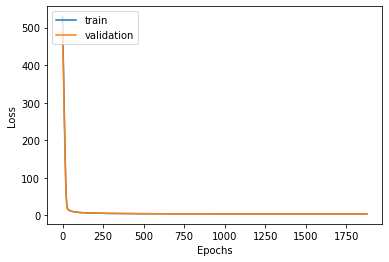

In [17]:
# train sddr model with formulars_only_linear
formulas = {'rate': formulars_only_linear}
sddr = Sddr(output_dir=output_dir,
            distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters,
            )
sddr.train(structured_data=X_train,
           target='bp_syst',
           plot=True)

In [20]:
partial_effects = sddr.eval('rate')

Nothing to plot. No (non-)linear partial effects specified for this parameter. (Deep partial effects are not plotted.)


<Figure size 720x360 with 0 Axes>

In [21]:
distribution_layer, partial_effects_loaded = sddr.predict(X_test, plot=True,clipping=True)

Nothing to plot. No (non-)linear partial effects specified for this parameter. (Deep partial effects are not plotted.)


<Figure size 720x360 with 0 Axes>

In [22]:
y_pred_test=distribution_layer.mean

In [23]:
print(f'Mean squared error (MSE) : {mean_squared_error(y_pred_test, X_test["bp_syst"]):.2f}')
print(f'Mean absolute error (MAE) : {mean_absolute_error(y_pred_test, X_test["bp_syst"]):.2f}')
print(f'R^2: {r2_score(y_pred_test, X_test["bp_syst"]):.2f}')

Mean squared error (MSE) : 185.17
Mean absolute error (MAE) : 10.59
R^2: 0.23


Using device:  cpu


/Users/ruolinshen/Desktop/projects/PySDDR/Pysddr_newest/PySDDR/sddr/utils/utils.py:328: UserWarning: df too large: Degrees of freedom (df = 6) cannot be larger than the rank of the design matrix (rank = 2). 
            Unpenalized base-learner with df = 2 will be used. Re-consider model specification.
  df_lam = df2lambda(dm_spline, P[0], df)
/Users/ruolinshen/Desktop/projects/PySDDR/Pysddr_newest/PySDDR/sddr/utils/utils.py:328: UserWarning: df too large: Degrees of freedom (df = 6) cannot be larger than the rank of the design matrix (rank = 2). 
            Unpenalized base-learner with df = 2 will be used. Re-consider model specification.
  df_lam = df2lambda(dm_spline, P[0], df)
/Users/ruolinshen/Desktop/projects/PySDDR/Pysddr_newest/PySDDR/sddr/utils/utils.py:328: UserWarning: df too large: Degrees of freedom (df = 6) cannot be larger than the rank of the design matrix (rank = 2). 
            Unpenalized base-learner with df = 2 will be used. Re-consider model specification.
  df

Beginning training ...
Train Epoch: 0 	 Training Loss: 591.419774
Train Epoch: 0 	 Validation Loss: 554.972412
Train Epoch: 1000 	 Training Loss: 3.953585
Train Epoch: 1000 	 Validation Loss: 3.965015
Validation loss has not improved for the last 500 epochs! To avoid overfitting we are going to stop training now


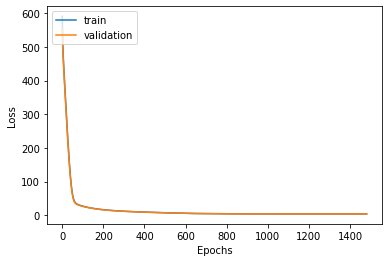

In [18]:
# train sddr model with formulars_with_spline
formulas = {'rate': formulars_with_spline}
sddr = Sddr(output_dir=output_dir,
            distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters,
            )
sddr.train(structured_data=X_train,
           target='bp_syst',
           plot=True)

/Users/ruolinshen/opt/anaconda3/envs/test/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


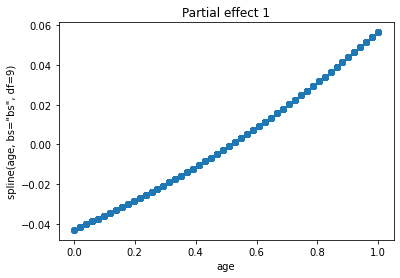

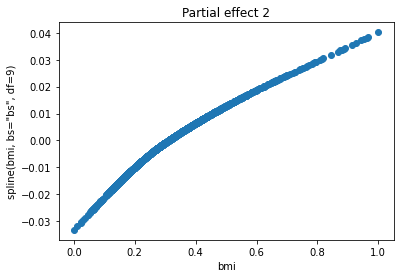

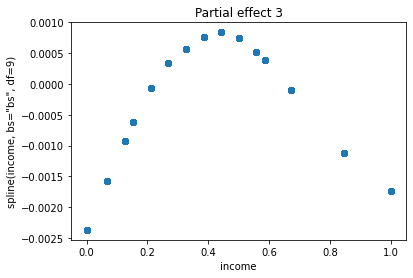

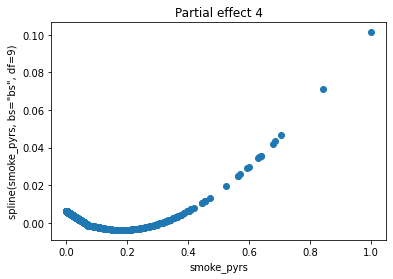

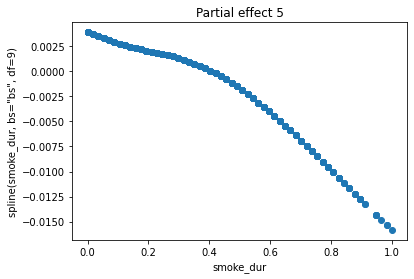

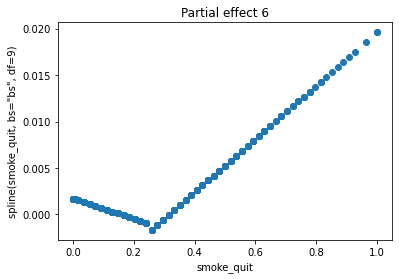

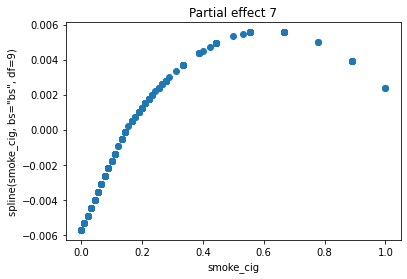

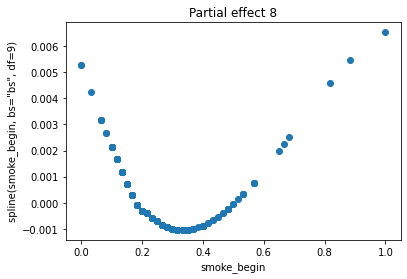

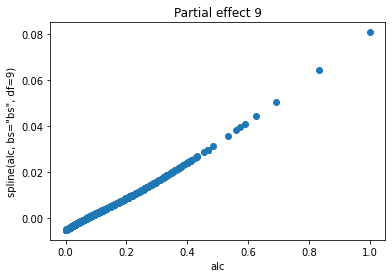

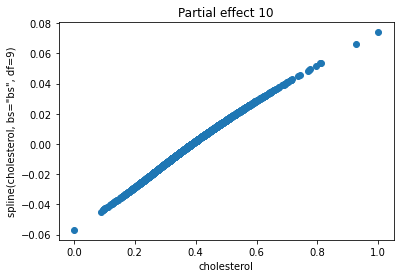

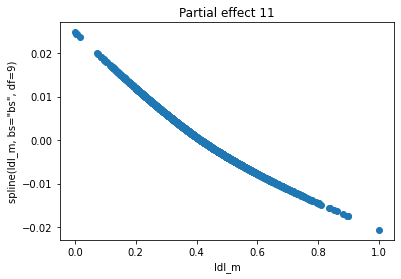

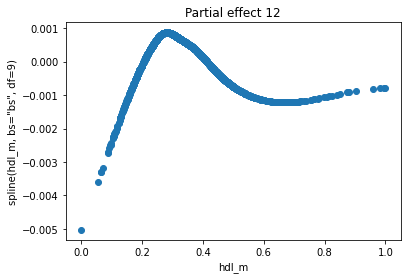

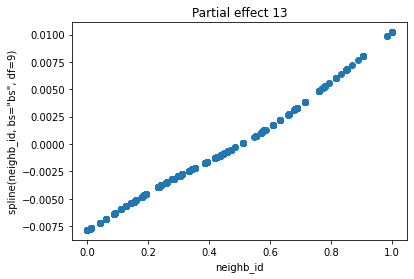

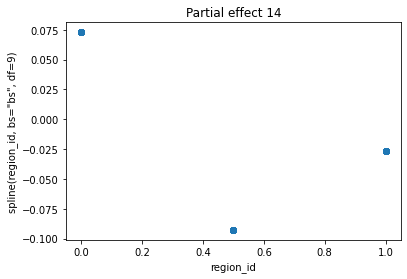

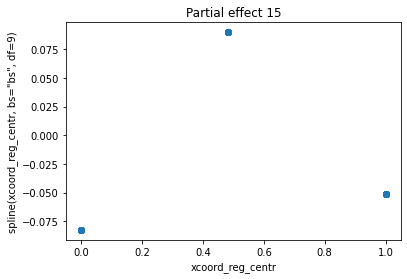

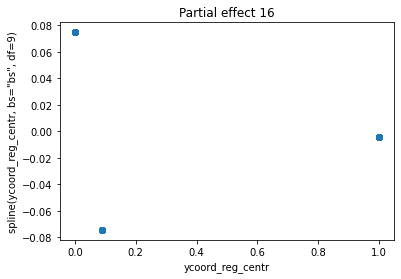

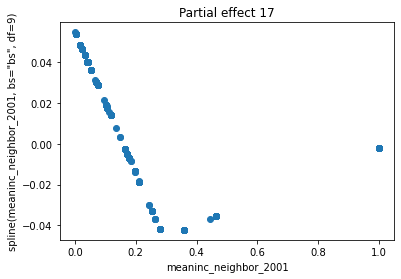

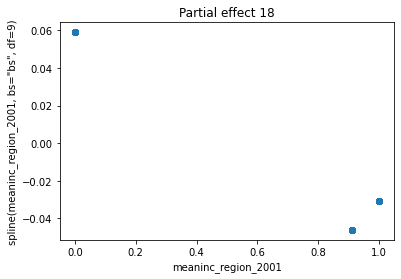

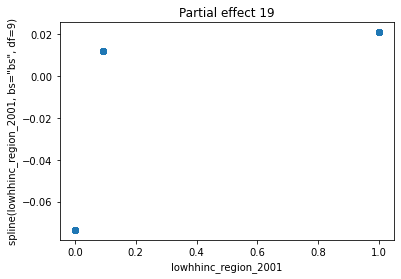

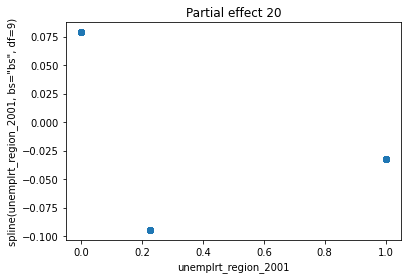

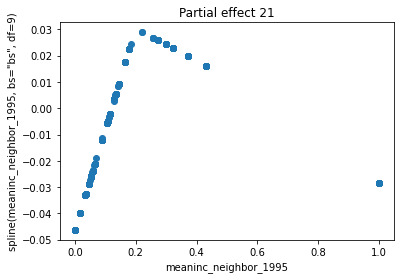

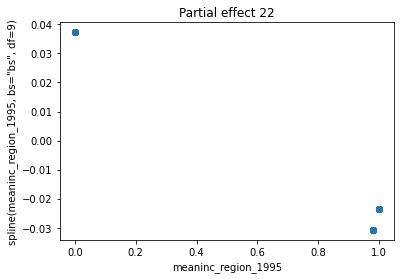

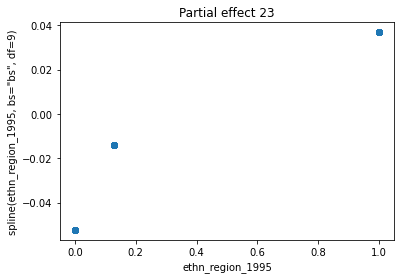

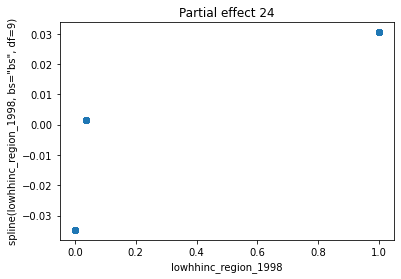

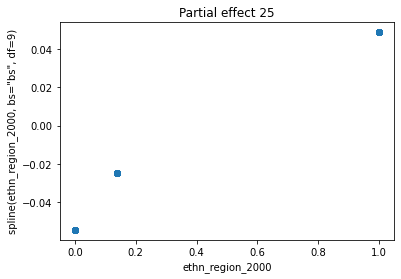

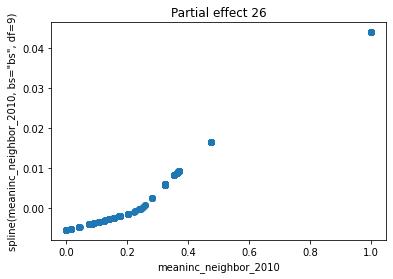

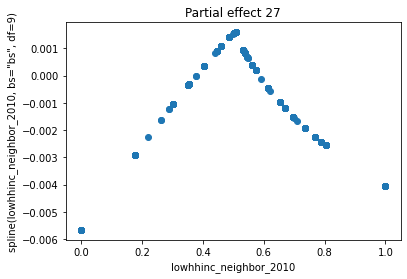

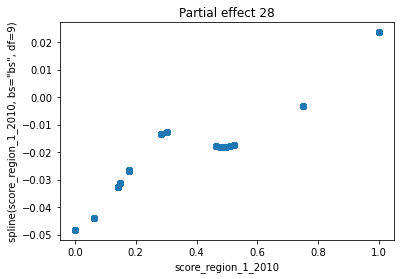

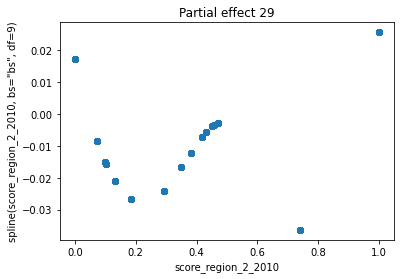

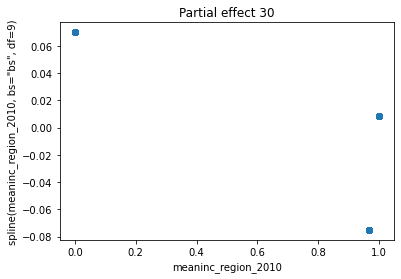

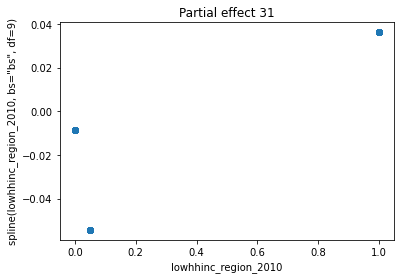

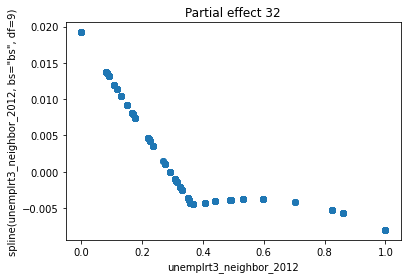

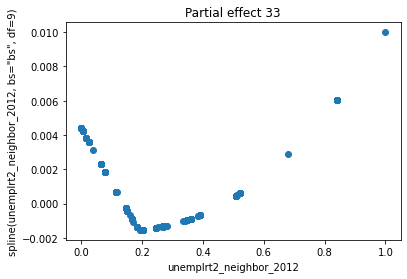

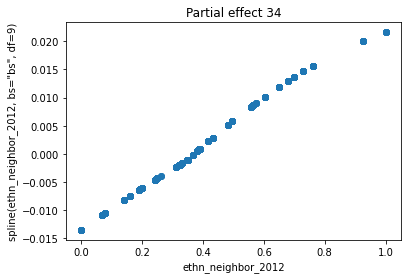

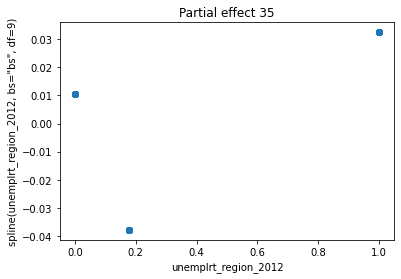

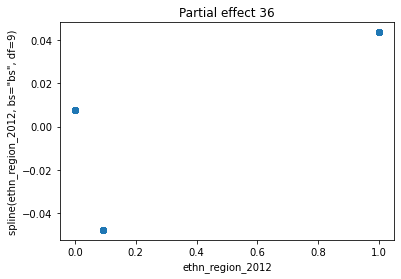

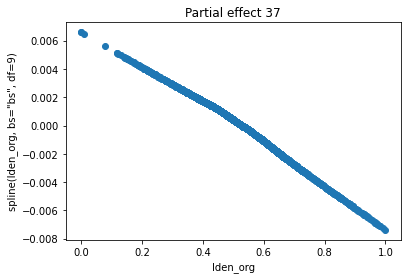

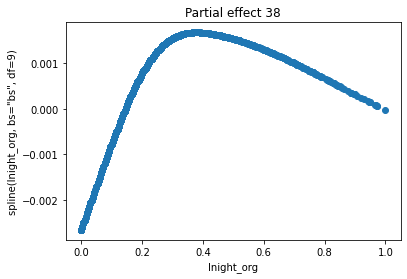

Mean squared error (MSE) : 177.39
Mean absolute error (MAE) : 10.18
R^2: 0.22


In [19]:
distribution_layer, partial_effects_loaded = sddr.predict(X_test, plot=True,clipping=True)
y_pred_test=distribution_layer.mean
print(f'Mean squared error (MSE) : {mean_squared_error(y_pred_test, X_test["bp_syst"]):.2f}')
print(f'Mean absolute error (MAE) : {mean_absolute_error(y_pred_test, X_test["bp_syst"]):.2f}')
print(f'R^2: {r2_score(y_pred_test, X_test["bp_syst"]):.2f}')

/Users/ruolinshen/opt/anaconda3/envs/test/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using device:  cpu


/Users/ruolinshen/Desktop/projects/PySDDR/Pysddr_newest/PySDDR/sddr/utils/utils.py:328: UserWarning: df too large: Degrees of freedom (df = 6) cannot be larger than the rank of the design matrix (rank = 2). 
            Unpenalized base-learner with df = 2 will be used. Re-consider model specification.
  df_lam = df2lambda(dm_spline, P[0], df)
/Users/ruolinshen/Desktop/projects/PySDDR/Pysddr_newest/PySDDR/sddr/utils/utils.py:328: UserWarning: df too large: Degrees of freedom (df = 6) cannot be larger than the rank of the design matrix (rank = 2). 
            Unpenalized base-learner with df = 2 will be used. Re-consider model specification.
  df_lam = df2lambda(dm_spline, P[0], df)
/Users/ruolinshen/Desktop/projects/PySDDR/Pysddr_newest/PySDDR/sddr/utils/utils.py:328: UserWarning: df too large: Degrees of freedom (df = 6) cannot be larger than the rank of the design matrix (rank = 2). 
            Unpenalized base-learner with df = 2 will be used. Re-consider model specification.
  df

Beginning training ...


/Users/ruolinshen/Desktop/projects/PySDDR/Pysddr_newest/PySDDR/sddr/sddrnetwork.py:95: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1940.)
  Q, R = torch.qr(X_sliced_with_orthogonalization_pattern)


Train Epoch: 0 	 Training Loss: 637.936009
Train Epoch: 0 	 Validation Loss: 580.864624
Train Epoch: 1000 	 Training Loss: 3.876981
Train Epoch: 1000 	 Validation Loss: 4.151903
Validation loss has not improved for the last 500 epochs! To avoid overfitting we are going to stop training now


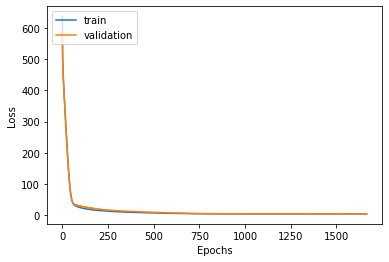

In [23]:
# train sddr model with formulas_with_nn
formulas = {'rate': formulas_with_nn}
sddr = Sddr(output_dir=output_dir,
            distribution=distribution,
            formulas=formulas,
            deep_models_dict=deep_models_dict,
            train_parameters=train_parameters,
            )
sddr.train(structured_data=X_train,
           target='bp_syst',
           plot=True)

/Users/ruolinshen/opt/anaconda3/envs/test/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


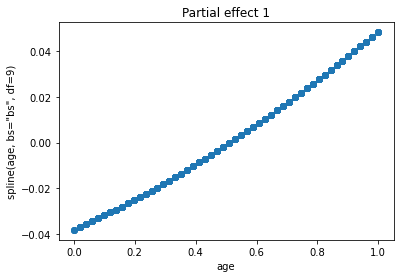

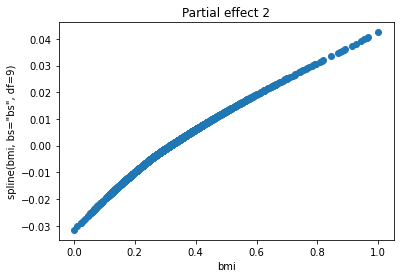

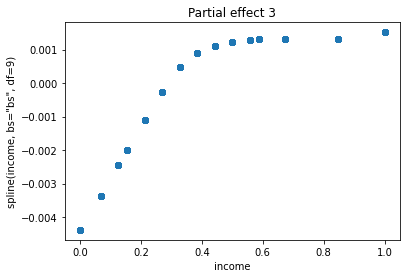

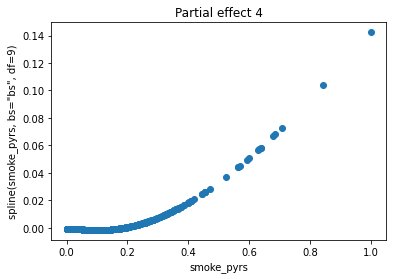

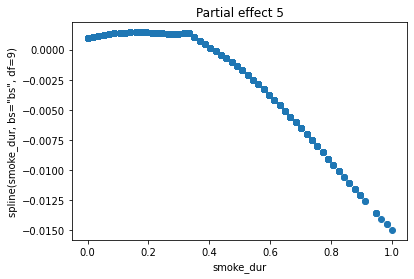

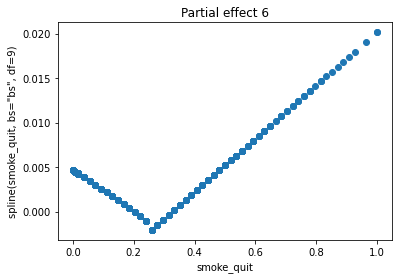

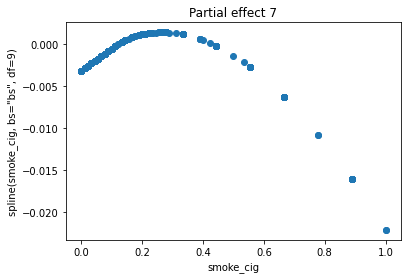

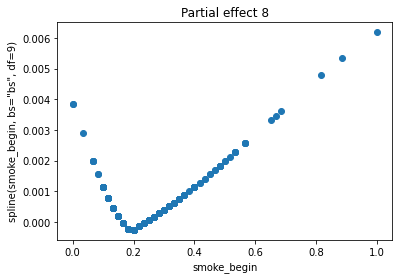

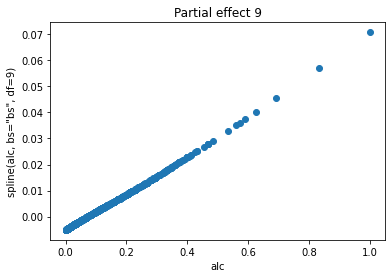

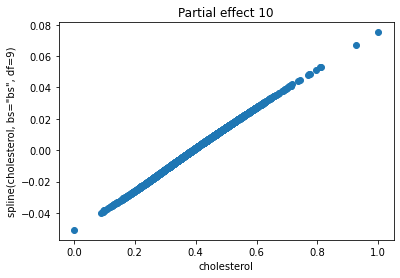

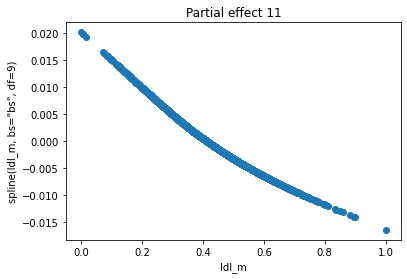

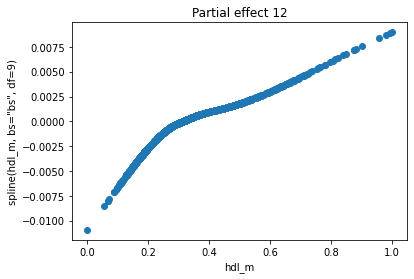

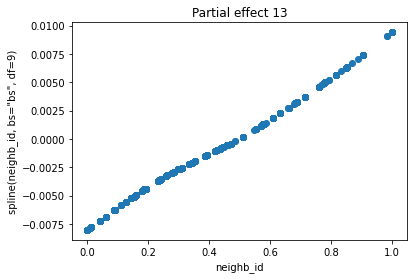

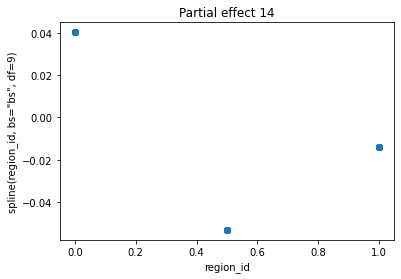

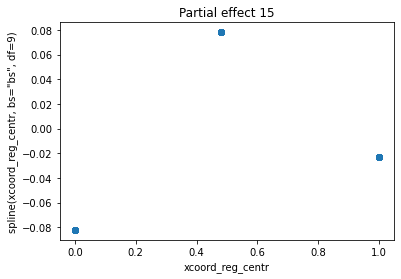

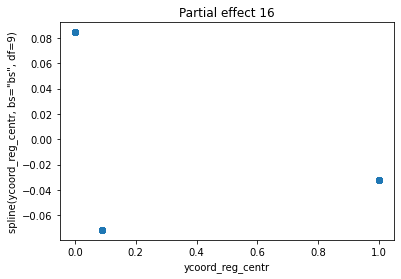

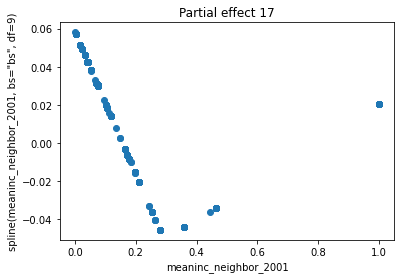

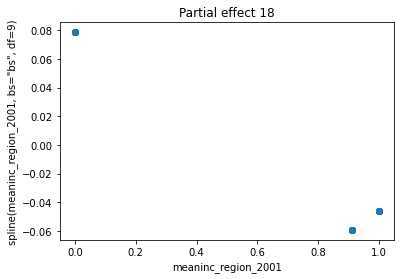

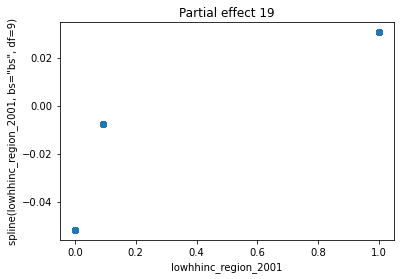

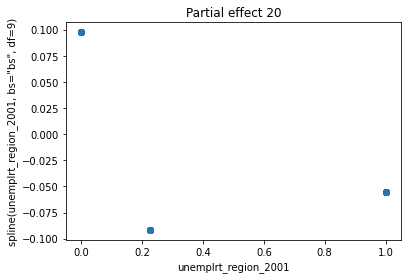

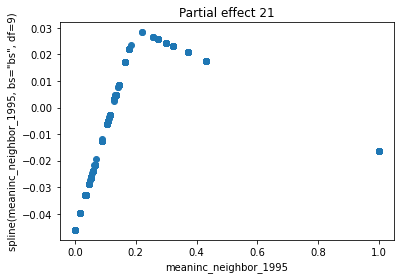

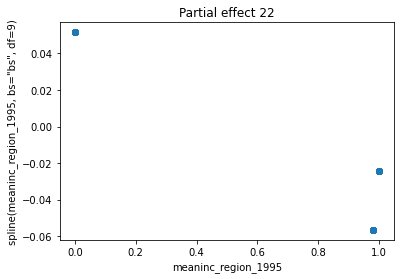

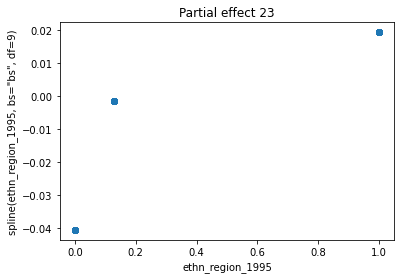

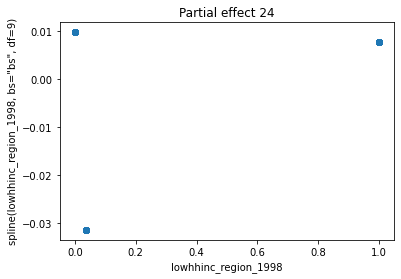

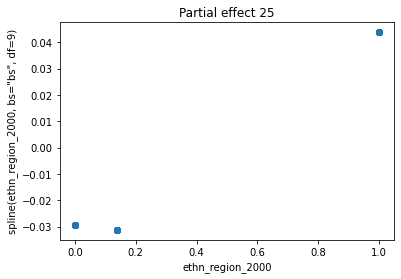

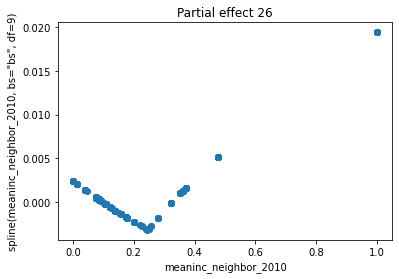

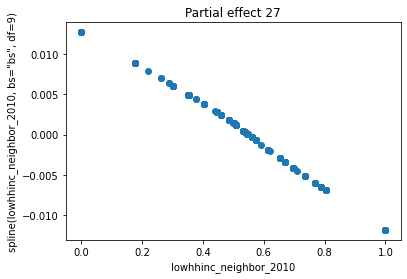

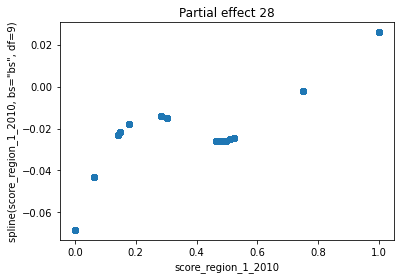

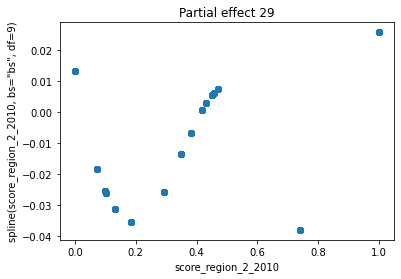

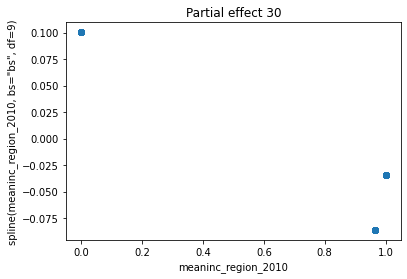

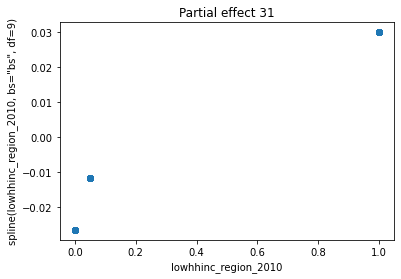

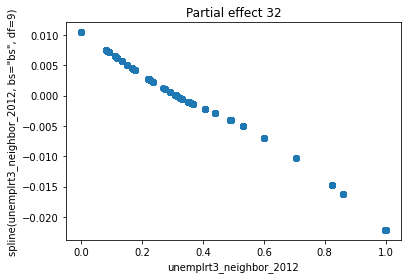

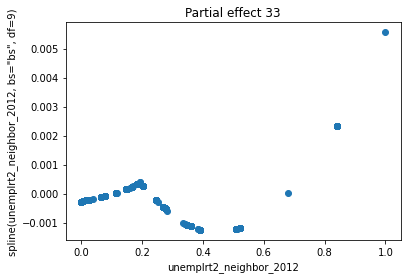

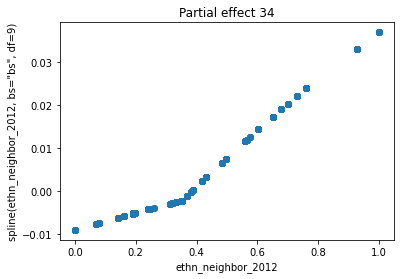

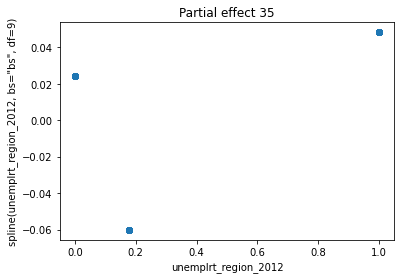

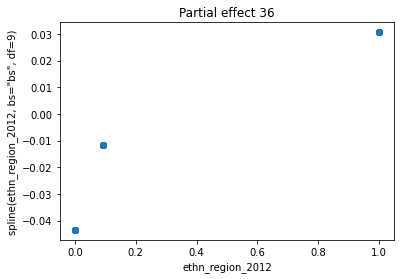

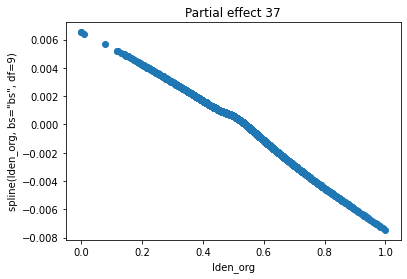

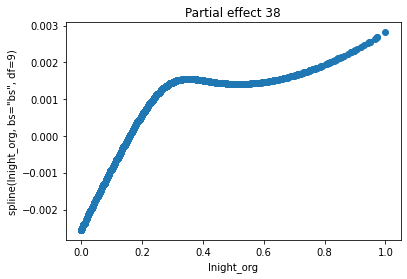

Mean squared error (MSE) : 243.11
Mean absolute error (MAE) : 11.98
R^2: 0.22


In [24]:
distribution_layer, partial_effects_loaded = sddr.predict(X_test, plot=True,clipping=True)
y_pred_test=distribution_layer.mean
print(f'Mean squared error (MSE) : {mean_squared_error(y_pred_test, X_test["bp_syst"]):.2f}')
print(f'Mean absolute error (MAE) : {mean_absolute_error(y_pred_test, X_test["bp_syst"]):.2f}')
print(f'R^2: {r2_score(y_pred_test, X_test["bp_syst"]):.2f}')

# Feature selection

In [26]:
features

['sex',
 'age',
 'year',
 'mar_stat',
 'bmi',
 'occstatus',
 'employed',
 'occup_blue',
 'edulev',
 'income',
 'menop',
 'smoking',
 'smoke_pyrs_cat',
 'smoke_pyrs',
 'smoke_dur',
 'smoke_quit',
 'smoke_cig',
 'smoke_begin',
 'etsa',
 'etsb',
 'physact',
 'physact01',
 'fruit_cat',
 'rawveg_cat',
 'meat_cat',
 'alc',
 'chrobro',
 'asthma',
 'chd',
 'cvd',
 'diab',
 'diab_typ',
 'famcvd',
 'med_statin',
 'med_hyp',
 'cholesterol',
 'ldl_m',
 'hdl_m',
 'neighb_id',
 'region_id',
 'xcoord_reg_centr',
 'ycoord_reg_centr',
 'urban',
 'meaninc_neighbor_2001',
 'meaninc_region_2001',
 'lowhhinc_region_2001',
 'unemplrt_region_2001',
 'meaninc_neighbor_1995',
 'meaninc_region_1995',
 'ethn_region_1995',
 'lowhhinc_region_1998',
 'ethn_region_2000',
 'meaninc_neighbor_2010',
 'lowhhinc_neighbor_2010',
 'score_region_1_2010',
 'score_region_2_2010',
 'meaninc_region_2010',
 'lowhhinc_region_2010',
 'unemplrt3_neighbor_2012',
 'unemplrt2_neighbor_2012',
 'ethn_neighbor_2012',
 'unemplrt_region_20

In [27]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_selection import SelectFromModel


data_path = '../../KORA_Noise_CleanData.csv'
data = pd.read_csv(data_path)

X = data[features]

# Output is the systolic Blood Pressure 
Y = data['bp_syst']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [28]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor())

In [29]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

10

In [30]:
print(selected_feat)

Index(['age', 'bmi', 'income', 'menop', 'alc', 'cvd', 'cholesterol', 'ldl_m',
       'hdl_m', 'lden_org'],
      dtype='object')


In [31]:
sel.estimator_.feature_importances_

array([1.16012558e-02, 4.44905204e-02, 1.27099024e-02, 4.76546990e-03,
       3.90502049e-02, 3.03097456e-03, 1.07753758e-03, 3.32553354e-03,
       4.07790679e-03, 1.61928778e-02, 2.12214345e-02, 2.21101105e-03,
       2.33876100e-03, 1.40619821e-02, 1.24490633e-02, 9.77719350e-03,
       9.38441338e-03, 1.20798829e-02, 1.83741758e-03, 1.41410726e-03,
       5.27056182e-03, 2.60321534e-03, 5.44487078e-03, 5.01542946e-03,
       4.58389535e-03, 2.19943472e-02, 1.68085492e-03, 1.20355852e-03,
       4.48966839e-03, 4.92809285e-01, 1.22614026e-03, 1.21553793e-03,
       2.77707934e-03, 1.45615771e-03, 1.16135353e-02, 2.91314286e-02,
       2.61216341e-02, 3.29278633e-02, 1.50754181e-02, 4.35954186e-04,
       6.06434447e-04, 4.24714685e-04, 1.09998101e-03, 6.18334398e-03,
       4.04944271e-04, 4.83119100e-04, 4.45136826e-04, 5.81077558e-03,
       5.56833355e-04, 3.92063772e-04, 6.28163641e-04, 4.66043125e-04,
       6.32614277e-03, 7.51461903e-03, 3.38737949e-03, 3.66931719e-03,
      

In [33]:
# Linear Regression with important features
important_features = selected_feat
X = data[important_features]
# Output is the systolic Blood Pressure 
Y = data['bp_syst']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

LR = linear_model.LinearRegression().fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
print(f'Mean squared error (MSE) : {mean_squared_error(y_test, y_pred_LR):.2f}')
print(f'Mean absolute error (MAE) : {mean_absolute_error(y_test, y_pred_LR):.2f}')
print(f'R^2: {r2_score(y_test, y_pred_LR):.2f}')

Mean squared error (MSE) : 182.11
Mean absolute error (MAE) : 10.20
R^2: 0.55


In [34]:
# Linear Regression with all features
X = data[features]
# Output is the systolic Blood Pressure 
Y = data['bp_syst']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

LR = linear_model.LinearRegression().fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)
print(f'Mean squared error (MSE) : {mean_squared_error(y_test, y_pred_LR):.2f}')
print(f'Mean absolute error (MAE) : {mean_absolute_error(y_test, y_pred_LR):.2f}')
print(f'R^2: {r2_score(y_test, y_pred_LR):.2f}')

Mean squared error (MSE) : 173.33
Mean absolute error (MAE) : 10.01
R^2: 0.57
